# Jane Chinwuko
# Batch number: DS2307

# This is a binary classification problem.

### Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
#### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
#### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


### Feature attributes
#### Age-----------	Employee's age
#### Gender-----------	Employee's Gender
#### BusinessTravel------------	Frequency of employees' business trips
#### DailyRate	-----------Daily salary rate for employees
#### Department-------------------	Office of employees
#### DistanceFromHome	---------------------Distance from home in miles to work
#### Education----------------------	Level of education achieved by staff
#### EducationField	-----------------Employee's field of study
#### EmployeeCount----------------------	Total number of employees in the organization
#### EmployeeNumber---------------------	A unique identifier for each employee record
#### EnvironmentSatisfaction-------------------	Employee satisfaction with their working environment
#### HourlyRate	-------------------Hourly rate for employees
#### JobInvolvement-----------------------Level of involvement required for the employee's job
#### JobLevel---------------------	Employee's level of work
#### JobRole-----------------	The role of employees in the organization
#### JobSatisfaction-------------------	Employee satisfaction with their work
#### MaritalStatus-------------	Employee's marital status
#### MonthlyIncome	--------------Employee's monthly income
#### MonthlyRate----------------------	Monthly salary rate for employees
#### NumCompaniesWorked	---------------Number of companies the employee worked for
#### Over18	---------------Whether the employee is over 18 years old
#### OverTime	---------------------Do employees work overtime
#### PercentSalaryHike	------------------Salary increase rate for employees
#### PerformanceRating	-------------The performance rating of the employee
#### RelationshipSatisfaction---------------------	Employee satisfaction with their relationships
#### StandardHours----------------------	Standard working hours for employees
#### StockOptionLevel------------------	Employee stock option level
#### TotalWorkingYears	---------------------------Total number of years the employee has worked
#### TrainingTimesLastYear----------------------	Number of times employees were taken to training in the last year
#### WorkLifeBalance-------------------------------	Employees' perception of their work-life balance
#### YearsAtCompany-----------------------	Number of years employees have been with the company
#### YearsInCurrentRole--------------------	Number of years the employee has been in their current role
#### YearsSinceLastPromotion----------------------	Number of years since employee's last promotion
#### YearsWithCurrManager----------------	Number of years an employee has been with their current manager
#### Attrition------------------	Does the employee leave the organization


#### Classifications of the various attributes

##### Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

##### EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

##### JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

##### JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

##### PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

##### RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

##### WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [1]:
# Imported necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
# loaded the dataset to a Pandas DataFrame
employee_attr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Exploratory Data Analysis

In [3]:
#Viewing the first 10 rows of the dataset
employee_attr.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
# Viewing the dimensions of the array
employee_attr.shape

(1470, 35)

We have 1470 rows and 35 columns in our dataset. Of these columns, we have 34 independent variables and 1 target variable(Attrition).

In [5]:
#Viewing the columns present in the dataset
columns = employee_attr.columns
columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
#Displays the basic information about the columns in the dataset
employee_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We have 26 columns that of datatype int64 and 9 columns having datatype object.

In [7]:
#displaying the descriptive statistics of all the features in the dataset
employee_attr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


All employees are considered adults as the minimum age is 18. EmployeeCount and StandardHours columns have Stanard Deviation value of 0.0. This indicates that every value found in this column is the same. We will drop these columns because we do not need them for our analysis. We have 26 Numerical Columns in our dataset.

In [8]:
#displaying the descriptive statistics of our categorical variables
employee_attr.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


We have 9 Categorical Columns in our dataset.

In [9]:
#checking for missing values
employee_attr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no Missing Values in our dataset.

In [10]:
# Printing the total number of duplicates across all the columns
duplicated = employee_attr.duplicated()

print("The number of duplicates in the dataset is:", employee_attr.duplicated().sum())

The number of duplicates in the dataset is: 0


In [11]:
# Display the count of the Attrition
employee_attr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
# Display the count of over18 column
employee_attr['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [13]:
# Display the count of EmployeeCount column
employee_attr['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [14]:
# Display the count of the StandardHours column
employee_attr['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

From the counts above we can see that Over18, EmployeeCount and StandardHours have same values. We will drop them as the values will have no effect in our analysis. We will also drop the EmployeeNumber column as it's not neccessary for our analysis and prediction.

In [15]:
# dropping the columns are not neccessary for analysis
employee_attr = employee_attr.drop(['Over18', 'EmployeeCount','StandardHours','EmployeeNumber'],axis=1)

In [16]:
# Viewing the dimensions of the array
employee_attr.shape

(1470, 31)

We now have 1470 rows and 31 columns in our dataset after dropping Over18, EmployeeCount, StandardHours and EmployeeNumber

In [17]:
# Display the count of Attrition rate based on travels of employees 
employee_attr['BusinessTravel'].groupby([employee_attr['Attrition']]).value_counts()

Attrition  BusinessTravel   
No         Travel_Rarely        887
           Travel_Frequently    208
           Non-Travel           138
Yes        Travel_Rarely        156
           Travel_Frequently     69
           Non-Travel            12
Name: BusinessTravel, dtype: int64

Employees that rarely travel had the highest attrition rate.

In [18]:
# Display the count of Attrition rate based on Education Field of employees
employee_attr['EducationField'].groupby([employee_attr['Attrition']]).value_counts()


Attrition  EducationField  
No         Life Sciences       517
           Medical             401
           Marketing           124
           Technical Degree    100
           Other                71
           Human Resources      20
Yes        Life Sciences        89
           Medical              63
           Marketing            35
           Technical Degree     32
           Other                11
           Human Resources       7
Name: EducationField, dtype: int64

Most of the employees that left are from the Life Sciences Educational fields.

In [19]:
# Display the count of Attrition rate based on Job Satisfaction of employees
employee_attr['JobSatisfaction'].groupby([employee_attr['Attrition']]).value_counts()

Attrition  JobSatisfaction
No         4                  407
           3                  369
           2                  234
           1                  223
Yes        3                   73
           1                   66
           4                   52
           2                   46
Name: JobSatisfaction, dtype: int64

Job satisfaction did not have an effect on attrition rate because the highest number of employees had a high job satisfcation.

<function matplotlib.pyplot.show(close=None, block=None)>

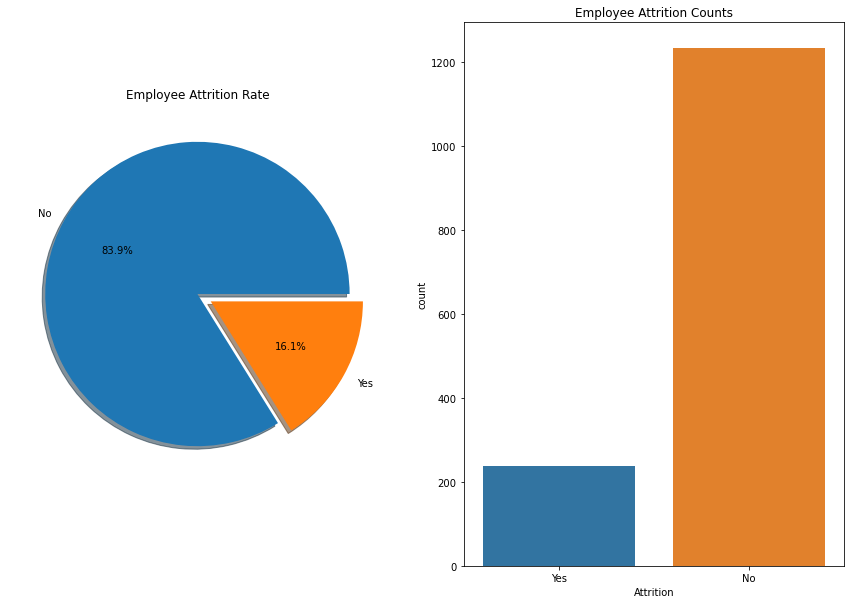

In [20]:
# This pieplot shows the percentage of Employee Attrition
f, ax = plt.subplots(1,2, figsize = (15,10))
employee_attr['Attrition'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%',ax = ax[0], shadow = True)
ax[0].set_title('Employee Attrition Rate')
ax[0].set_ylabel('')

# This countplot shows the distribution Employee Attrition
sns.countplot(x ='Attrition', data = employee_attr,  ax = ax[1])
ax[1].set_title('Employee Attrition Counts')
plt.show

We can see that the value count of our attrition column is unbalanced. This company has a 16.1% employee attrition rate.

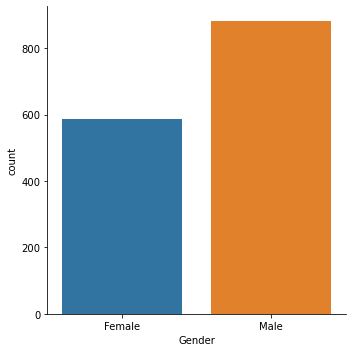

In [21]:
# This catplot shows the distribution of gender of the employees.
sns.catplot(x ='Gender', data = employee_attr, kind = 'count')

We have more male than female employees.

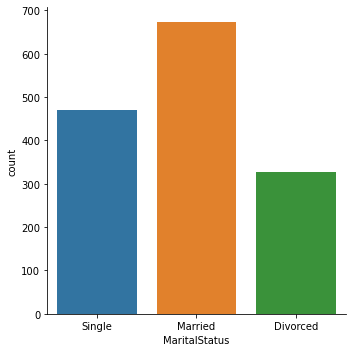

In [22]:
# This catplot shows the count of Marital Status of the employees.
sns.catplot(x ='MaritalStatus', data = employee_attr, kind = 'count')

Most of the employees are married.

<Figure size 504x504 with 0 Axes>

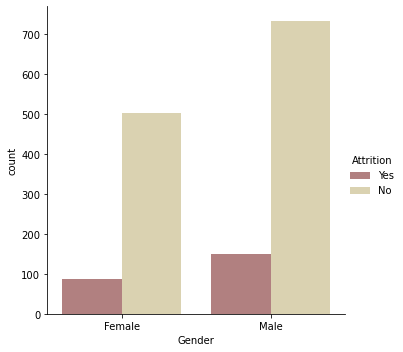

In [23]:
# This catplot shows the count of employees attrition based on gender.
plt.figure(figsize=(7,7))
sns.catplot(x="Gender", kind="count",hue = 'Attrition', palette="pink", data=employee_attr)

Male employee attrition is higher than female employee attrition. 

<Figure size 720x504 with 0 Axes>

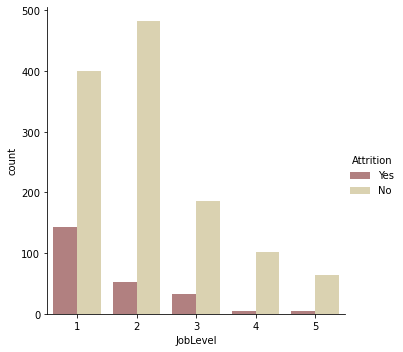

In [24]:
# This catplot shows the count of employees attrition based on job level
plt.figure(figsize=(10,7))
sns.catplot(x="JobLevel", kind="count",hue = 'Attrition', palette="pink", data=employee_attr)

Level 1 employees have the highest attrition rate. We can refer to level 1 as entry level; a position that doesn't require any experience or relevant education. Once these employees gain experience they tend to look out for better jobs with higher salary.

<Figure size 504x504 with 0 Axes>

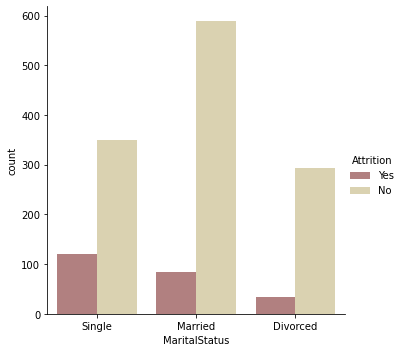

In [25]:
# This catplot shows the count of employees attrition based on marital status.
plt.figure(figsize=(7,7))
sns.catplot(x="MaritalStatus", kind="count",hue = 'Attrition', palette="pink", data=employee_attr)

Divorced employees have a lower attrition rate.
Single employees have a higher attrition rate.

(array([0, 1, 2]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Human Resources')])

<Figure size 504x504 with 0 Axes>

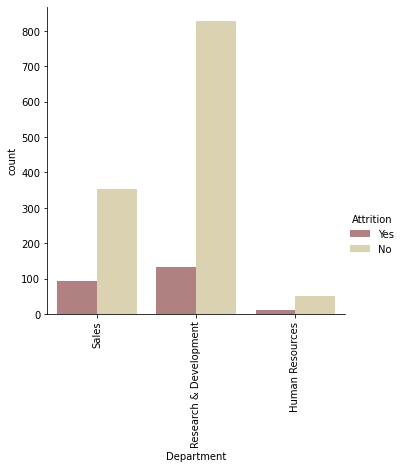

In [26]:
# This catplot shows the count of employees attrition based on their department
plt.figure(figsize=(7,7))
sns.catplot(x="Department", kind="count",hue = 'Attrition', palette="pink", data=employee_attr)
plt.xticks(rotation = 90)


Employees in the Research and development had the highest attrition rate. "The retention of key Research and Development experts has been recognized as a critical managerial challenge for many technology-based companies" according to a Chang, J., Choi, J. and Kim, M. (2008) ‘Turnover of highly educated R&D professionals: The role of pre-entry cognitive style, work values and career orientation’, Journal of Occupational & Organizational Psychology, 81, pp. 299–317. Available at: https://doi.org/10.1348/096317907X204453.

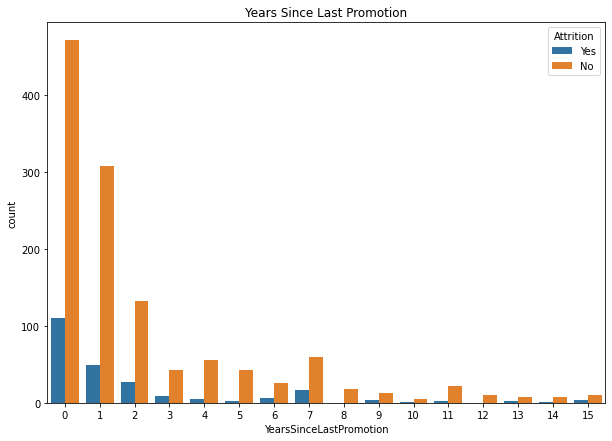

In [27]:
# countplot showing the employees attrition based on number of years since the employees was last promoted
plt.figure(figsize=(10,7))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=employee_attr)
plt.title('Years Since Last Promotion')
plt.show()


This shows that most of the employees that left got promoted recently. They probably left after promotion to get a higher position in another company.

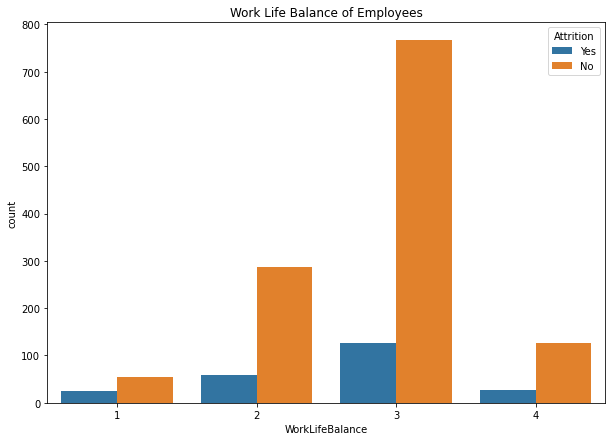

In [28]:
# countplot showing the employees attrition based on WorkLifeBalance
plt.figure(figsize=(10,7))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=employee_attr)
plt.title('Work Life Balance of Employees')
plt.show()


The highest employees that left had a better work life balance. It is possible that some of the employees that left had a bad work life balance and couldn't cope on the job. 

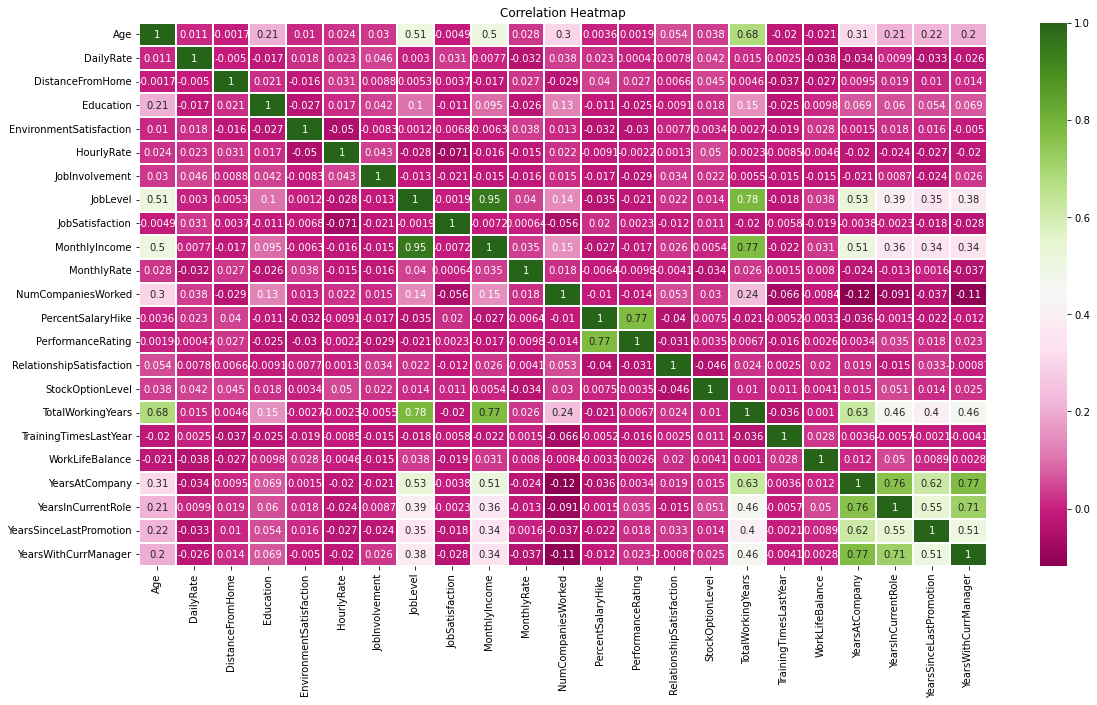

In [29]:
# Using heatmap to visualize the correlation between the numerical features.

plt.figure(figsize=(19,10))
sns.heatmap(employee_attr.corr(), annot=True, linewidths = 2, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

From the heatmap above, we can see that there exist a high correlation between some features:

##### 1) The monthlyincome is highly correlated with joblevel
##### 2) YearsAtCompany, YearsWithCurrManager, YearsSinceLastPromotion & YearsInCurrentRole


### Data Pre-processing

In [30]:
#import Label Encoder from sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

#Converted all categorical values to number
#Selects the columns that are not integer
columns = list(employee_attr.select_dtypes(exclude=['float64','int64']))
le = LabelEncoder()
for i in columns:
 #print(i)
 employee_attr[i] = le.fit_transform(employee_attr[i])
employee_attr.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

In [31]:
# split data into x and y
X = employee_attr.drop('Attrition',axis =1)
y = employee_attr['Attrition']
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [32]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)
X_test=sc.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.703764,-0.891688,0.565311,0.254625,0.816497,-1.224807,...,-0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,0.590048,-0.469754,-0.493817,-0.393938,-1.868426,0.565311,1.169781,0.816497,-1.175601,...,-0.426230,-1.584178,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.640727,0.085049,-0.937414,-0.660531,0.816497,1.038693,...,2.346151,-0.658973,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,-0.913194,0.546677,1.401512,-0.887515,0.085049,0.565311,1.169781,0.816497,-0.142264,...,-0.426230,1.191438,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


 We scaled our variables using StandardScaler so that they have a similar scale.

In [33]:
#Used oversampling to handling imbalance in the Type of Glass column
term_sm = SMOTE()
X_res, y_res = term_sm.fit_resample(x, y)
y_res.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

Our class counts are now balanced.

# Model Building

In [34]:
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 42)

# Viewing the dimensions of our training and testing data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1972, 30), (494, 30), (1972,), (494,))

We splitted our data in X_train, X_test, y_train and y_test. We shall be using the train variables for the purpose of training our model while the test variables will be used to validate the performance of our model. 80% of our data will be used to train the model while 20% will be used for model validation.

## 1. Random Forest

In [35]:
# Create a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for Random Forest is: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Random Forest is: 0.94


[[237  13]
 [ 19 225]]


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       250
           1       0.95      0.92      0.93       244

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494



### Cross Validation Score for Random Forest

In [36]:
results = []
scores = cross_val_score(rf, X_train, y_train,cv=5)  # You can choose a different scoring metric
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Random Forest',accuracy, mean_score, diff])

Cross-validation scores: [0.95189873 0.92658228 0.93908629 0.94162437 0.91624365]
Mean accuracy: 0.94


The difference between the accuracy score and the cross validation score is: 0.00013560658896949462


## 2. Xgboost Classifier

In [37]:
# Create a Xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"The Accuracy for Xgboost Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_xgb)
print(confusion_matrix(y_test, y_pred_xgb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Xgboost Classifier is:  0.9331983805668016


[[240  10]
 [ 23 221]]


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       250
           1       0.96      0.91      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494



### Cross Validation Score for Xgboost Classifier

In [38]:

scores = cross_val_score(xgb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Xgboost Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.93164557 0.90886076 0.9213198  0.91624365 0.93654822]
Mean accuracy: 0.92


The difference between the accuracy score and the cross validation score is: 0.010274779718636107


## 3. Adaboost classifier

In [39]:
# Create a Adaboost Classifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

y_pred_ab = ab.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_ab)
print(f"The Accuracy for Adaboost classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_ab)
print(confusion_matrix(y_test, y_pred_ab))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Adaboost classifier is:  0.9048582995951417


[[231  19]
 [ 28 216]]


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       250
           1       0.92      0.89      0.90       244

    accuracy                           0.90       494
   macro avg       0.91      0.90      0.90       494
weighted avg       0.91      0.90      0.90       494



### Cross Validation Score for Adaboost classifier

In [40]:
scores = cross_val_score(ab, X_train, y_train,cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Adaboost classifier',accuracy, mean_score, diff])

Cross-validation scores: [0.9164557  0.87848101 0.90609137 0.91624365 0.89340102]
Mean accuracy: 0.90


The difference between the accuracy score and the cross validation score is: 0.0027237497011622924


## 4. Gradient Boosting Classifier

In [41]:
# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"The Accuracy for Gradient Boosting Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_gb)
print(confusion_matrix(y_test, y_pred_gb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Gradient Boosting Classifier is:  0.917004048582996


[[239  11]
 [ 30 214]]


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       250
           1       0.95      0.88      0.91       244

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



### Cross Validation Score for Gradient Boosting Classifier

In [42]:

scores = cross_val_score(gb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Gradient Boosting Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.92911392 0.92911392 0.93147208 0.91878173 0.92893401]
Mean accuracy: 0.93


The difference between the accuracy score and the cross validation score is: -0.010479084489033785


## 5. Decision Tree

In [43]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"The Accuracy for Decision Tree: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_dt)
print(confusion_matrix(y_test, y_pred_dt))
print('\n')
print("Classification Report:")
print(report)


The Accuracy for Decision Tree: 0.85


[[209  41]
 [ 34 210]]


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       250
           1       0.84      0.86      0.85       244

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494



### Cross Validation Score for Decision Tree

In [44]:

scores = cross_val_score(dt, X_train, y_train,cv=5)
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Decision Tree',accuracy, mean_score, diff])

Cross-validation scores: [0.83291139 0.86329114 0.84517766 0.86040609 0.81979695]
Mean accuracy: 0.84


The difference between the accuracy score and the cross validation score is: 0.00386148919072804


In [45]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy Score','Cross Validation Score', 'Difference btw accuracy and Cross Validtion Score'])
df

,Algorithm,Accuracy Score,Cross Validation Score,Difference btw accuracy and Cross Validtion Score
0,Random Forest,0.935223,0.935087,0.000136
1,Xgboost Classifier,0.933198,0.922924,0.010275
2,Adaboost classifier,0.904858,0.902135,0.002724
3,Gradient Boosting Classifier,0.917004,0.927483,-0.010479
4,Decision Tree,0.848178,0.844317,0.003861


#### Selection of the best model

In [46]:
#Selection of the best model based on the difference between the accuracy and cross validation score
least_value = min(df['Difference btw accuracy and Cross Validtion Score'].tolist())
best_model = df.loc[(df['Difference btw accuracy and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model is the', best_model)

From the table above, my best model is the Gradient Boosting Classifier


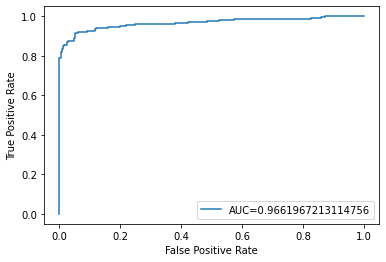

In [47]:
#ROC plot of the best model
import sklearn.metrics as metrics
#define metrics
y_pred_proba = gb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

From the ROC curve above, we can see that the AUC value for our best model is 96.6%

In [50]:
from sklearn.model_selection import GridSearchCV

model_best = GradientBoostingClassifier()

model_param = {
    'max_depth':[3,5,10,None],
    'n_estimators':[10,100,200],
    'max_features':[1,3,5,7],
    'min_samples_leaf':[1,2,3]
           }

In [51]:
gd_search = GridSearchCV(model_best, model_param, cv = 5)

gd_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [10, 100, 200]})

In [52]:
#display the best parameters from the search

print("The best max_depth is : " + str(gd_search.best_params_["max_depth"]),
     "\nThe best n_estimators: " + str(gd_search.best_params_["n_estimators"]),
     "\nThe best max_features: " + str(gd_search.best_params_["max_features"]),
      "\nThe best min_samples_leaf: " + str(gd_search.best_params_["min_samples_leaf"]))

The best max_depth is : 10 
The best n_estimators: 100 
The best max_features: 3 
The best min_samples_leaf: 2


In [53]:
# train the model with the selected parameters
best_model = GradientBoostingClassifier(max_depth =10, n_estimators  = 100, max_features =3, min_samples_leaf = 2)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9433198380566802

In [54]:
import pickle
# save the model to disk
filename = 'Emp_attrition.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [55]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
accuracy_dataframe = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
#converting the values of our subscribed back to yes and no.
accuracy_dataframe = accuracy_dataframe.replace({0: 'No', 1: 'Yes'})
accuracy_dataframe

,y_test,y_pred
1078,No,No
1281,Yes,No
621,No,No
1508,Yes,Yes
1975,Yes,Yes
...,...,...
2099,Yes,Yes
1836,Yes,Yes
303,No,No
1864,Yes,Yes


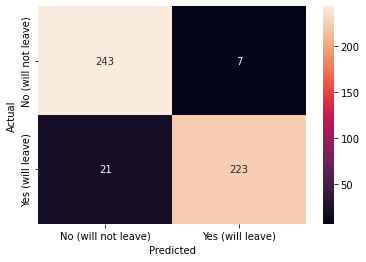

In [56]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
label=['No (will not leave)', 'Yes (will leave)']
sns.heatmap(matrix, annot=True, fmt='d', xticklabels=label, yticklabels=label,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Conclusion

This is a binary classification problem because the target variable is classified into two categories (no or yes). We used the IBM_HR_Attrition_Rate_Analytics dataset to analyse why employees attrition is high in the organisation and make predictions whether or not if an employee will leave or stay based on the features provided. The dataset is made up 1470 rows and 35 columns. Of these columns, we have 34 independent variables and 1 target variable(Attrition). We visualized the relationships between some features. 
#### Some of the observations recorded are:
##### 1) Most of the employees that left were from the Life Sciences Educational fields.
##### 2) Male employee attrition was higher than female employee attrition.
##### 3) Job satisfaction did not have an effect on attrition rate because the highest number of employees had a high job satisfcation.
##### 4) Level 1 employees had the highest attrition rate. We referred  level 1 as entry level; a position that doesn't require any experience or relevant education. We are of the opinion that possible reason when these level 1 employee leave is that once they have gained experience, they tend to look out for better jobs with higher salary.

We used different algorithms to train our model. 80% of the data was used for taining while 20% was used for validation. The criteria we used in the selection of best model is accuracy and cross validation score. We calculated the difference between these scores and selected the algorithm that had the lowest result.
Random Forest Classifier was selected as our best model because it had a lower difference between accuracy and cross validation score. The accuracy score before tuning was 0.917004 and after tuning with set parameters, the model's accuracy increased to 0.943319. There was an improvement in the accuracy after tuning. Testing the performance of the model, we can see that from the 10 predictions made, the model was able to predict 9 correctly. We can also see from the confusion matrix that the model predicted that 243 will not leave and actually they did not leave (True Negative). It predicted 223 will leave and they did leave (True Positive). The model predicted that 21 will not leave whereas, they left (False Negative). Predicted 7 will leave while they did not leave (False Positive).